In [357]:
from sklearn.ensemble import IsolationForest
import pickle
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [591]:
example_df = pd.read_csv('example_data_v2.csv')

In [621]:
example_df2 = example_df.drop(columns =['Unnamed: 0', 'index', 'possible_email', 'possible_address','possible_phone_numbers'])


In [826]:
final_final_df = pd.read_csv('final_final_df.csv')

In [752]:
X = final_final_df.drop(columns = ['Unnamed: 0', 'index',
       'possible_email', 'possible_address', 
       'possible_phone_numbers',
        'link',
       'dodane-data', 'id', 'title', 'category-tree-item', 'user-profile-link',
       'filters', 'pay_low', 'pay_high', 'pay_currency', 'pay_period',
       'Lokalizacja', 'Wymiar pracy', 'Typ umowy'])

In [763]:
X["label"] = -1
X_EXAMPLE = pd.concat([X, example_df2], axis=0).reset_index(drop=True)
X_EXAMPLE2 = X_EXAMPLE.drop(columns=['label','preprocessed_description','description'])

In [772]:
#nasz model po tuningu
iso_forest = IsolationForest(contamination=0.033,random_state=31)

iso_forest.fit(X_EXAMPLE2)

iso_forest_pred = iso_forest.predict(X_EXAMPLE2)

X_EXAMPLE['iso'] = iso_forest_pred
comparison = X_EXAMPLE[X_EXAMPLE["label"]!=-1].loc[:,["label", "iso"]]
comparison.loc[:,["label","iso"]].value_counts()


label  iso
0      -1     15
1       1     12
0       1      9
1      -1      1
dtype: int64

In [945]:
with open('iso_model.pkl', 'wb') as file:
    pickle.dump(iso_forest, file)

In [785]:
len(np.where(X_EXAMPLE['iso']==-1))

(array([  66,   90,  138,  182,  189,  198,  250,  299,  400,  521,  524,
         532,  585,  618,  714,  757,  780,  893,  916,  962,  963, 1033,
        1079, 1134, 1162, 1185, 1194, 1237, 1270, 1355, 1358, 1390, 1400,
        1480, 1483, 1503, 1547, 1622, 1651, 1664, 1702, 1735, 1743, 1789,
        1826, 1864, 1870, 1880, 1909, 1932, 1961, 1964, 1965, 1966, 1967,
        1968, 1969, 1970, 1971, 1972, 1973, 1977, 1978, 1984, 1985, 1986]),)

In [ ]:
#90, 1972, 1969, 1970, 1973, 1977

In [944]:
X_EXAMPLE.loc[90,'description']

'TA PRACA ZMIENIŁA MOJE ŻYCIE W 2022 ROKU.\r\n\r\nPOZWOLIŁA MI CIESZYĆ SIĘ ŻYCIEM I SPEŁNIAĆ SWOJE MARZENIA O PODRÓŻOWANIU!\r\n\r\nNIE MUSZĘ LICZYĆ KAŻDEJ WYDANEJ ZŁOTÓWKI NA PRZYJEMNOŚCI!\r\n\r\nMOŻE ZMIENIĆ TAKŻE TWOJE ŻYCIE W DOBIE INFLACJI W 2023 roku !\r\n\r\nZAPRASZAM CIĘ SERDECZNIE A OBIECUJĘ ŻE SIE NIE ZAWIEDZIESZ!\r\n\r\nDZIĘKI TEJ PRACY SPEŁNISZ SWOJE CELE I NIESPEŁNIONE MARZENIA W 2023 ROKU!\r\n\r\nTEŻ BYŁEM NA TWOIM MIEJSCU, DZIĘKI TEJ PRACY TY MOŻESZ BYĆ NA MOIM.\r\n\r\nale pamiętaj, jak to mówi klasyk;\r\n\r\n"SAMO SIĘ NIC NIE ZROBI".\r\n\r\nCO OFERUJEMY:\r\n\r\nTygodniówki - pewne wypłaty co tydzień, bezpośrednio na konto bankowe, 4 razy w przeciągu miesiąca! Zamiast czekać do 10 - dziesiątego, pieniądze trafiają na nasze konto co tydzień ! mamy stały przypływ gotówki.\r\n\r\nPraca w pełni zdalna - możliwość pracowania bez wychodzenia z domu, bądź z jakiegokolwiek miejsca na ziemi, nie musisz jeździć po biurach, stać w korkach czy czekać na autobusy albo modlić się czy t

In [782]:
X_EXAMPLE.loc[66,'description']

' Poszukujemy osoby, która specjalizuje się w obsłudze klienta i będzie odpowiedzialna za udzielanie odpowiedzi na wiadomości. Istnieje możliwość pracy zdalnej lub stacjonarnej w Warszawie.  Ze względu na dynamiczny rozwój naszego zespołu, poszukujemy osób zainteresowanych współpracą zarówno krótko-, jak i długoterminową. Mimo trudnego klimatu gospodarczego, zapewniamy naszym pracownikom godziwe warunki oraz wysoki standard życia. Jako zespół, dążymy do stabilności nawet w trudnych czasach, takich jak inflacja, wzrost cen i obciążenia podatkowe.  Jeśli dołączysz do nas, staniesz się cennym członkiem naszego zespołu! Praca może być traktowana jako dodatek do studiów lub etatu, ale oferujemy atrakcyjne zarobki, które mogą stanowić stabilne i jedyne źródło dochodu.  Współpracujemy z polską firmą, która odnosi sukcesy na rynku od ponad 21 lat.  Twoja rola polegać będzie głównie na udzielaniu odpowiedzi na wiadomości od klientów, korzystając z gotowych skryptów i formułek. Będziesz również 

In [747]:
#faktycznie są fałszywe
X_EXAMPLE.loc[90,'description']

'TA PRACA ZMIENIŁA MOJE ŻYCIE W 2022 ROKU.\r\n\r\nPOZWOLIŁA MI CIESZYĆ SIĘ ŻYCIEM I SPEŁNIAĆ SWOJE MARZENIA O PODRÓŻOWANIU!\r\n\r\nNIE MUSZĘ LICZYĆ KAŻDEJ WYDANEJ ZŁOTÓWKI NA PRZYJEMNOŚCI!\r\n\r\nMOŻE ZMIENIĆ TAKŻE TWOJE ŻYCIE W DOBIE INFLACJI W 2023 roku !\r\n\r\nZAPRASZAM CIĘ SERDECZNIE A OBIECUJĘ ŻE SIE NIE ZAWIEDZIESZ!\r\n\r\nDZIĘKI TEJ PRACY SPEŁNISZ SWOJE CELE I NIESPEŁNIONE MARZENIA W 2023 ROKU!\r\n\r\nTEŻ BYŁEM NA TWOIM MIEJSCU, DZIĘKI TEJ PRACY TY MOŻESZ BYĆ NA MOIM.\r\n\r\nale pamiętaj, jak to mówi klasyk;\r\n\r\n"SAMO SIĘ NIC NIE ZROBI".\r\n\r\nCO OFERUJEMY:\r\n\r\nTygodniówki - pewne wypłaty co tydzień, bezpośrednio na konto bankowe, 4 razy w przeciągu miesiąca! Zamiast czekać do 10 - dziesiątego, pieniądze trafiają na nasze konto co tydzień ! mamy stały przypływ gotówki.\r\n\r\nPraca w pełni zdalna - możliwość pracowania bez wychodzenia z domu, bądź z jakiegokolwiek miejsca na ziemi, nie musisz jeździć po biurach, stać w korkach czy czekać na autobusy albo modlić się czy t

## Wizualizacje SHAP

In [766]:
exp = shap.TreeExplainer(iso_forest) 
shap_values = exp.shap_values(X_EXAMPLE2) 
shap.initjs()

In [803]:
shap_values = exp.shap_values(X_EXAMPLE2) 

In [812]:
np.mean(shap_values,axis=1).max()

0.16745775277034294

In [802]:
np.mean(shap_values,axis=1).min()

-0.628908673688206

In [799]:
shap_values1 = exp.shap_values(X_EXAMPLE2[X_EXAMPLE['iso']==-1]) 
np.mean(shap_values1,axis=1).max()

-0.36533169120835146

In [ ]:
#od momentu -0.365 klasyfikujemy jako -1, -0.628 to najbardziej dąży do minus 1, 0.1674 

In [768]:
with open('exp.pkl', 'wb') as file:
    pickle.dump(exp, file)

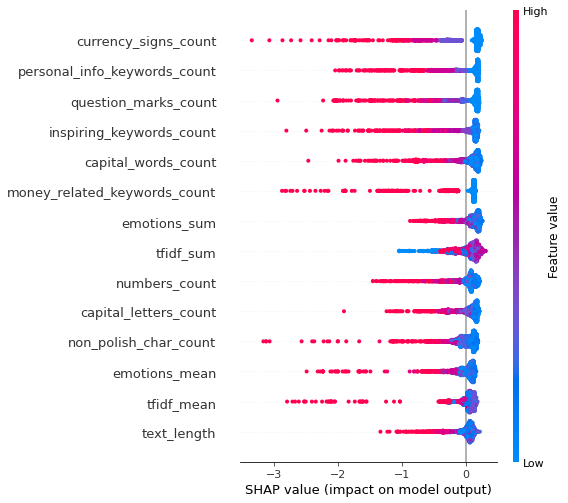

In [652]:
shap.summary_plot(shap_values, X_EXAMPLE2)

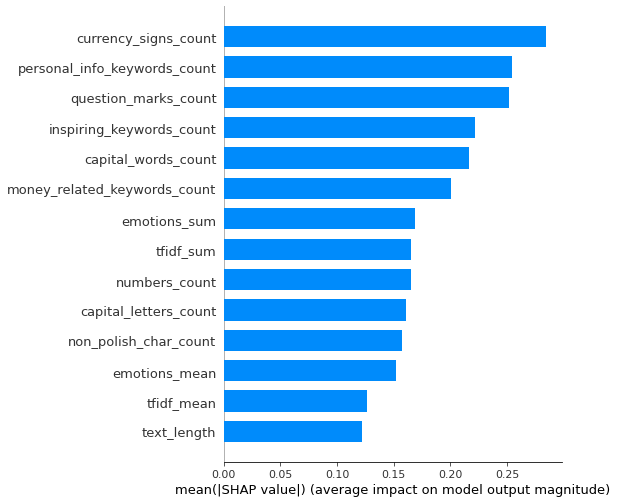

In [649]:
shap.summary_plot(shap_values, X_EXAMPLE2,plot_type="bar")

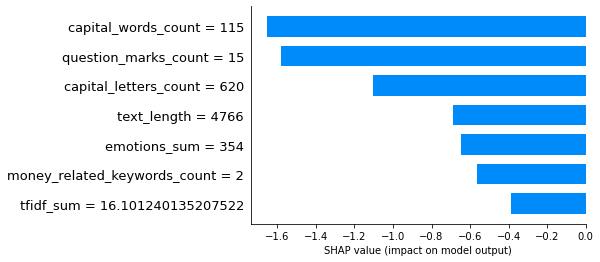

In [650]:
#dla przykładowego 90. obserwacji
shap.bar_plot(shap_values[90],features =X_EXAMPLE2.iloc[90,:] ,feature_names =X_EXAMPLE2.columns )

## Zapis tabeli + predict i końcowymi kolumnami

In [994]:
def predict_and_get_cols(ROW):

    #wybranie kolumn do predict
    ROW = ROW.drop(columns = ['Unnamed: 0'])
    row_small = ROW.drop(columns = ['description', 'preprocessed_description', 'index',
           'possible_email', 'possible_address', 
           'possible_phone_numbers',
            'link',
           'dodane-data', 'id', 'title', 'category-tree-item', 'user-profile-link',
           'filters', 'pay_low', 'pay_high', 'pay_currency', 'pay_period',
           'Lokalizacja', 'Wymiar pracy', 'Typ umowy'])
    #predict
    #print(row_small.columns)
    iso_forest_pred = iso_forest.predict(row_small)

    #dodanie kolumny predict
    ROW['Predict_Flag'] = iso_forest_pred


    #dodanie explain
    exp = shap.TreeExplainer(iso_forest)
    shap_values1 = exp.shap_values(row_small.iloc[0,:])
    pr = np.mean(shap_values1)
    if pr <0.18:
        pr = (abs(pr-0.18))
    else:
        pr = 0
        
    if pr>1:
        pr=1
    ROW['Predict_Prob'] = pr
    
    cols = np.where(shap_values1<0)
    string = 'Odstaje od danych bo: '
    for col in cols:
        val = row_small.iloc[0, col][0]
        c = row_small.columns[col][0]
        string += f'{c} : {val}, '

    # Remove the trailing comma
    string = string.rstrip(', ')

    ROW['Explain'] = string
    return ROW

In [999]:
ROW = final_final_df.loc[32:33].head(1)
r = predict_and_get_cols(ROW)
r['Predict_Prob']

32    0.071263
Name: Predict_Prob, dtype: float64

In [989]:
ROW = final_final_df.head(1)
ROW

,Unnamed: 0,description,preprocessed_description,index,tfidf_sum,tfidf_mean,emotions_sum,emotions_mean,text_length,capital_letters_count,...,category-tree-item,user-profile-link,filters,pay_low,pay_high,pay_currency,pay_period,Lokalizacja,Wymiar pracy,Typ umowy
0,0,"Jesteś młodą, rzetelną osobą, chcącą podjąć si...","być młodą, rzetelny osobą, chcieć podjąć zarob...",0,13.767936,0.000794,204.0,0.011769,2952,256,...,Strona główna/Praca/Marketing i PR/Media i PR/...,https://www.olx.pl/oferty/uzytkownik/beuNf/,Doświadczenie nie jest wymagane/Elastyczny cza...,3000.0,7000.0,zł,mies. brutto,Wałbrzych,Dodatkowa / sezonowa,Inny


In [927]:
def predict_and_get_cols(ROW):    
    #wybranie kolumn do predict
    ROW = ROW.drop(columns = ['Unnamed: 0'])
    row_small = ROW.drop(columns = ['description', 'preprocessed_description', 'index',
           'possible_email', 'possible_address', 
           'possible_phone_numbers',
            'link',
           'dodane-data', 'id', 'title', 'category-tree-item', 'user-profile-link',
           'filters', 'pay_low', 'pay_high', 'pay_currency', 'pay_period',
           'Lokalizacja', 'Wymiar pracy', 'Typ umowy'])
    #predict
    iso_forest_pred = iso_forest.predict(row_small)

    #dodanie kolumny predict
    ROW['Predict_Flag'] = iso_forest_pred
    

    #dodanie explain
    exp = shap.TreeExplainer(iso_forest) 
    shap_values1 = exp.shap_values(row_small)

    ROW['Predict_Prob'] = np.mean(shap_values1,axis=1)
    ROW['Predict_Prob'] = ROW['Predict_Prob'].apply(lambda x: (abs(x-0.18)) if x < 0.18 else 0)   
    ROW['Predict_Prob'] = ROW['Predict_Prob'].apply(lambda x: 1 if x > 1 else x)       
    ROW['Explain'] =  ""
    for i in range(ROW.shape[0]):
        string = 'Odstaje od danych bo: '
        cols = np.where(shap_values1[i]<0)[0]
        for col in cols:
            val = row_small.iloc[i, col]
            c = row_small.columns[col]
            string += f'{c} : {val}, '

        string = string.rstrip(', ')

        ROW.loc[i,'Explain'] = string
    return ROW

In [928]:
WHOLE_DF = predict_and_get_cols(final_final_df)
WHOLE_DF.to_csv('WHOLE_DF')

In [938]:
# otrzymujemy konta które wstawiły fake job z threshold 0.6 jako prawdopodobieństwo
fake_acc = pd.unique(WHOLE_DF.loc[np.where(WHOLE_DF['Predict_Prob']>0.6),'user-profile-link'])
fake_acc

array(['https://www.olx.pl/oferty/uzytkownik/1x12B/',
       'https://www.olx.pl/oferty/uzytkownik/1Slv9/',
       'https://www.olx.pl/oferty/uzytkownik/po7Rn/',
       'https://www.olx.pl/oferty/uzytkownik/XRXJ/',
       'http://action.olx.pl',
       'https://www.olx.pl/oferty/uzytkownik/1RxhB/',
       'https://www.olx.pl/oferty/uzytkownik/15HLl/',
       'https://www.olx.pl/oferty/uzytkownik/A5ftl/',
       'https://www.olx.pl/oferty/uzytkownik/xVh5/',
       'http://kasastefczyka.olx.pl', 'http://gi-group.olx.pl',
       'https://www.olx.pl/oferty/uzytkownik/wkV5/',
       'https://www.olx.pl/oferty/uzytkownik/2AB9r/',
       'https://sprzedajemy.pl/oferty-uzytkownika-9499217',
       'https://sprzedajemy.pl/oferty-uzytkownika-9350905',
       'https://sprzedajemy.pl/oferty-uzytkownika-9635862',
       'https://sprzedajemy.pl/oferty-uzytkownika-9429124',
       'https://sprzedajemy.pl/oferty-uzytkownika-9685626'], dtype=object)

In [942]:
#zapisujemy te konta
d = {'user': fake_acc}
df = pd.DataFrame(data=d)
df.to_csv('fake_users.csv')

## Dodatkowy model

In [303]:
#DODATKOWO INNY MODEL STATYSTYCZNY DO SZUKANIA
#końcowo nie użyliśmy ale dawał dobre rozwiązania
def subspace_ad(data):
    projected_data = np.array(data)
    angles = np.zeros((data.shape[0], data.shape[0]))
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            angles[i, j] = np.arccos(np.dot(projected_data[i], projected_data[j]) / np.linalg.norm(projected_data[i]) / np.linalg.norm(projected_data[j]))

    outlier_scores = np.mean(angles, axis=1)
   
    return outlier_scores



threshold = 0.8
outlier_scores = subspace_ad(normalized_data)
outliers = np.where(outlier_scores > 1.688)[0]
print("Number of Outliers:")
print(len(outliers))

invalid value encountered in arccos
